<a href="https://colab.research.google.com/github/GaryChen1990/ximen0725/blob/main/Classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification 題目
鳶尾花 從sklearn dataset 取資料

經驗法則:欄位越少,問題就有可能越簡單

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
datas = pd.DataFrame(iris["data"], columns = iris["feature_names"])
datas["ans"] = iris["target"]
datas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
#demo1 ,每次結果都是亂數
#train_test_split([1,2,3,4], test_size=0.25)

#demo2 ,兩list以上對應關係保留
#train_test_split([1,2,3,4],[5,6,7,8], test_size=0.25)

# x為輸入資料 y為結果
x = datas.drop("ans", axis=1)
y = datas["ans"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

$ gini = \sum p_i(1-q_i)$

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [48, 45, 42]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 87\nvalue = [0, 45, 42]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.35\ngini = 0.153\nsamples = 48\nvalue = [0, 44, 4]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.083\nsamples = 46\nvalue = [0, 44, 2]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')]

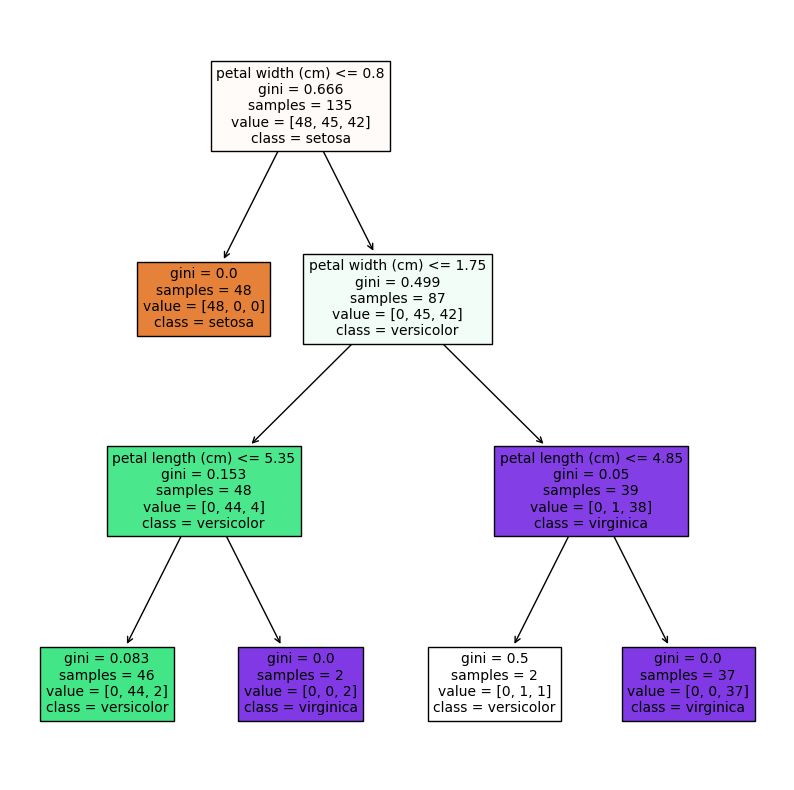

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf, feature_names=x.columns, class_names=iris["target_names"], filled=True)

#每次決策點都會找出條件讓結果兩邊的gini coefficient(加起來最小

In [ ]:
#將結果帶入 進行預測值推斷(模型結果估測率)

from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.8666666666666667